# Matematyczne podstawy modelowania komputerowego

Jakub Spiechowicz

Wyklad 03, Rownania nieliniowe

# Sformulowanie problemu

Niech f: $\mathbb{R} \to \mathbb{R}$. Rozwiazywanie dowolnego rownania algebraicznego mozna sprowadzic do problemu poszukiwania miejsca zerowego funkcji.

$$ f(x) = 0 $$

Przykladowo:

* W teorii dyfrakcji swiatla wystepuje rownanie $x = \tan{x}$, ktore latwo sprowadzic do postaci $x - \tan{x} = 0$
* Obliczanie orbit planet wymaga rozwiazania rownania Keplera $x - a\sin{x} = b$

# Rozwiazania analityczne rownan

* $ax + b = 0$
* $ax^2 + bx + c = 0$
* $ax^3 + bx^2 + cx + d = 0$ (wzory Cardano)
* $ax^4 + bx^3 + cx^2 + dx + e = 0$ (wzory Ferrari)
* oraz niektore specyficzne przypadki np. $\sin{x} + \cos{x} = 1$

# Glowne zastosowania

* Niejawne (implicit) metody numeryczne rozwiazywania rownan rozniczkowych zwyczajnych
* Numeryczna optymalizacja (poszukiwanie ekstremow funkcji)

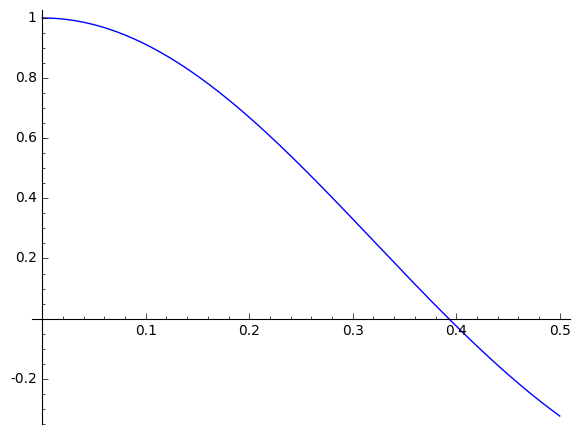

In [1]:
var('x')
f(x) = exp(-x**2)*cos(4*x)
plot(f(x), (x,0,0.5), figsize=6)

# Metoda Brute Force

Poszukujemy rozwiazania $f(x) = 0$ w przedziale $[a,b]$:

* Wyznaczamy $n + 1$ punktow $(x_i, y_i)$, $y_i = f(x_i)$, $i = 0,...,n$ przy czym $a = x_0 < x_1 < ... < x_{n-1} < x_n = b$
* Sprawdzamy czy $y_i < 0$ i $y_{i+1} > 0$, tzn. czy $y_iy_{i+1} < 0$
* Jezeli tak jest, to f(x) = 0 w przedziale $[x_i,x_{i+1}]$

\begin{align}
f(x) &\approx f(x_i) + f'(x_i)(x - x_i) + O[(x_{i+1} - x_i)^2] \nonumber\\ &= f(x_i) + \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}(x - x_i) = y_i + \frac{y_{i+1} - y_i}{x_{i+1} - x_i}(x - x_i)
\end{align}

Szukamy takiego $x$, dla ktorego $f(x) = 0$, skad

$$ x = x_i - \frac{x_{i+1} - x_i}{y_{i+1} - y_i}y_i$$

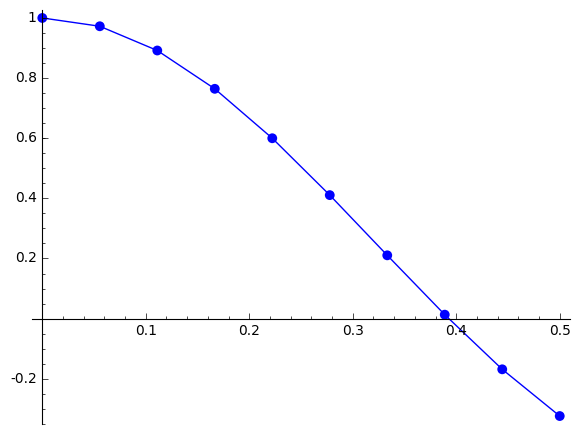

In [15]:
import numpy
def f(x):
    return exp(-x**2)*cos(4*x)
a = 0
b = 0.5
x = numpy.linspace(a,b,10)
y = f(x)
xy = zip(x,y)
show(point(xy,size=50)+line(xy,figsize=6))

In [22]:
a = 0
b = 0.5
x = numpy.linspace(a,b,1000)
y = f(x)

pierwiastek = None
for i in range(len(x)-1):
    if y[i]*y[i+1] < 0:
        pierwiastek = x[i] - (x[i+1] - x[i])/(y[i+1] - y[i])*y[i]
        break
    elif y[i] == 0:
        pierwiastek = x[i]
        break

if pierwiastek is None:
    print 'Nie znaleziono pierwiastka w przedziale [%g, %g]' % (x[0], x[-1])
else:
    print 'Pierwiastek wynosi x = %f' % pierwiastek

Pierwiastek wynosi x = 0.392699


Blad mozemy oszacowac jako $O[(x_{i+1} - x_i)^2] = O[(\frac{b-a}{n})^2]$.

# Metoda bisekcji

Twierdzenie Bolzano-Cauchy'ego (o wartosci posredniej)

Niech $f$ bedzie funkcja ciagla okreslona na zbiorze domknietym $[a,b]$ taka, ze $f(a) \neq f(b)$. Wowczas dla dowolnej wartosci $y_0$ lezacej pomiedzy $f(a)$ i $f(b)$ istnieje przynajmniej jeden $x_0 \in (a,b)$ taki, ze 

$$f(x_0) = y_0.$$

Wniosek

Jezeli $f(a)f(b) < 0$ wtedy istnieje co najmniej jeden $x^*$ taki, ze 

$$f(x^*) = 0.$$

Poszukujemy rozwiazania $f(x) = 0$ w przedziale $[a,b]$:

* Obliczamy $f(\frac{a+b}{2})$
* Jezeli $f(a)f(\frac{a+b}{2}) < 0$ to powtarzamy krok 1) w przedziale $[a, \frac{a+b}{2}]$
* Jezeli $f(\frac{a+b}{2})f(b) < 0$ to powtarzamy krok 1) w przedziale $[\frac{a+b}{2},b]$

In [4]:
def bisekcja(f, a, b, blad):
    x0 = (a+b)/2
    while((b - a) >= blad):
        if (f(a)*f(x0) < 0):
            b = x0
        else:
            a = x0
        x0 = (a+b)/2
    return x0
print bisekcja(f, 0, 0.5, 1e-6)

0.392698764801025


Zauwazmy, ze blad wyznaczenia $x^*$ wynosi w $n$-tym kroku 

$$\varepsilon = |x_n - x^*| < \frac{b-a}{2^{n+1}}.$$

Uwagi

* Blad wyznaczenia $x^*$ maleje dwukrotnie z kazda iteracja algorytmu, a zatem jest zbiezny do 0
* Wolne tempo zbieznosci do rozwiazania
* Metoda bisekcji pozwala znalezc wylacznie jeden pierwiastek w danym przedziale

# Zadanie

Zaimplementuj metode bisekcji i przetestuj jej dzialanie dla funkcji $f(x) = x^2$ oraz $f(x) = x^2 - 4\sin{x}$. W jaki sposob nalezy ja zmodyfikowac aby efektywnie znajdowac pierwiastki parzystych rzedow?

In [5]:
var('x')
f(x)=x^3+3*x-5
fp(x)=diff(f(x),x)

x0 = 2.2
a = -0.2
b = 2.7

function = plot(f(x), (x,a,b), linestyle='-', thickness=2, color='blue', legend_label='f(x)')
tangent = plot( (fp(x0)*(x-x0)+f(x0)) , (x,1.5,b), linestyle='--', thickness=3, color='red', legend_label='styczna w x0')
textt = text('x1', (1.5,-3), color='black')
points = list_plot( [(x0, f(x0)), (x0, 0), (1.5,0)], color='black', size=70)
textp = text('x0', (x0,-2), color='black')
Exact = list_plot( [(1.15,0)] , color='blue', size=70)
#textExact = text('rozw dokladne', (1.15,-2), color='blue')

# Metoda Newtona-Raphsona

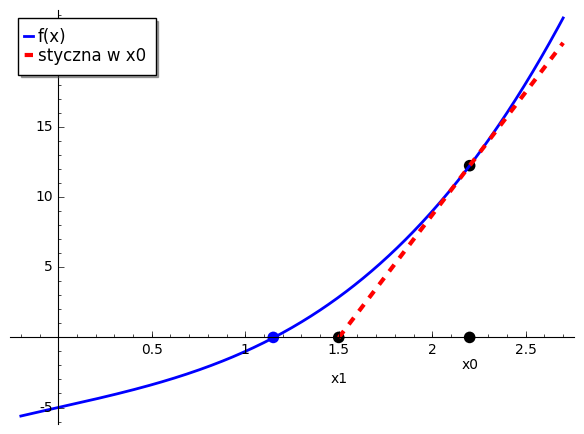

In [6]:
show(function+tangent+textt+points+textp+Exact,figsize=6)

Poszukujemy rozwiazania $f(x) = 0$ w otoczeniu punktu $x_0$, dla ktorego $f'(x_0) \neq 0$.

$$f(x) \approx f(x_0) + f'(x_0)(x - x_0)$$

docelowo $f(x) = 0$, dlatego

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}, \quad n = 0, 1, 2, 3, ...$$

Uwagi

* Zazwyczaj zbiega do rozwiazania znacznie szybciej niz metoda bisekcji
* Moze okazac sie rozbiezna!
* Pochodna wystepujaca w algorytmie mozna obliczac numerycznie albo wyeliminowac stosujac metode siecznych

In [7]:
def NewtonRaphson(f, fp, x0, blad):
    x1 = x0
    while(abs(f(x1)) >= blad):
        x1 = x1 - f(x1)/fp(x1)
    return x1
f(x) = exp(-x**2)*cos(4*x)
fp(x) = diff(f(x),x)
print NewtonRaphson(f, fp, 0.5, 1e-6)

0.392699013332433


Twierdzenie o wartosci sredniej

Niech $f(x)$ bedzie funkcja rozniczkowalna na przedziale $(a,b)$. Wowczas

$$f(b) = f(a) + f'(\xi)(b-a)$$

dla $\xi \in (a,b)$.

Blad wyznaczenia $x^*$ w $n$-tym kroku $\varepsilon = |x_n - x^*|$.

$$f(x_n) = f(x_n) - f(x^*) = f'(\xi_n)(x_n - x^*),$$

skad

$$\varepsilon = |x_n - x^*| = \left|-\frac{f(x_n)}{f'(\xi_n)}\right| \approx \left|-\frac{f(x_n)}{f'(x_n)}\right| = |x_{n+1} - x_{n}|.$$ 

# Zadanie

Zaimplementuj metode Newtona-Raphsona oraz przetestuj jej dzialanie dla 
* $f(x) = x^3 - 2x + 2$ z warunkiem $x_0 = 0$ 
* $f(x) = x^2 - 4\sin{x}$ z warunkiem $x_0 = 1.5$.

# Metoda punktu stalego

Argument $c$ nalezacy do dziedziny funkcji $f$ nazywamy jej punktem stalym jezeli $f(c) = c$. Graficznie oznacza to, ze jest to odcieta punktu przeciecia sie wykresu funkcji z prosta $y = x$.

Zauwazmy, ze problem rozwiazania rowniania $g(x) = 0$ mozna na ogol sprowadzic do postaci $f(x) = x$, a tym samym do poszukiwania punktu stalego funkcji $f$. W tym celu startujac z $x_0$ nalezy iterowac schemat

$$x_n = f(x_{n-1}), \quad n \geq 1.$$


In [8]:
var('x')
f(x) = 2*sqrt(sin(x))
a = 1.25
b = 2.75
x0 = 2.5
allPlots = plot( f(x), (x, a, b) )
allPlots += plot( x, (x, a, b), color = 'black')
allPlots += line([(x0,0),(x0,f(x0))], color='red', linestyle = '-.', thickness=3)
steps = 0
while steps<4:
    if steps != 0:
        allPlots += line([(x0,x0),(x0,f(x0))], color='red', linestyle = '-.', thickness=3)
    allPlots += list_plot( [(x0,f(x0))] , size = 50)
    allPlots += line([(x0,f(x0)), (f(x0),f(x0))], color='red', linestyle = '-.', thickness=3)
    allPlots += list_plot( [ (f(x0) , f(x0)) ] , size = 50)
    steps = steps+1
    x0=f(x0)

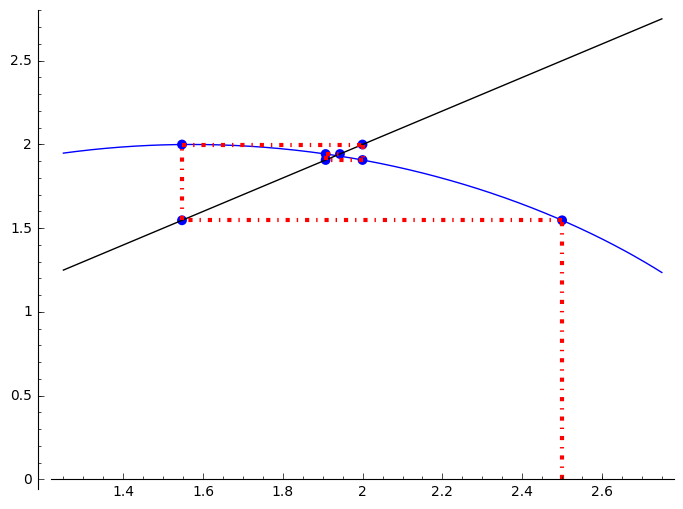

In [9]:
show(allPlots,figsize=7)

In [10]:
def punktstaly(f, x0, blad):
    x1=f(x0)
    while(abs(x1-x0) >= blad):
        x0 = x1
        x1 = f(x0)
    return x1

Przykladowo rozwiazmy $x^2 = 4\sin{x}$. Mamy $f(x) = 2\sqrt{\sin{x}}$.

In [11]:
f(x) = 2*sqrt(sin(x))
print punktstaly(f,2.0,1e-5)

1.93375261016082


Blad wyznaczenia punktu stalego $c$ w $n$-tym kroku $\varepsilon_n = |x_n - c|$.

\begin{align}
\varepsilon_{n+1} = |x_{n+1} - c| &= |f(x_n) - f(c)| = |f'(\xi_n)(x_n - c)| \nonumber \\&= |f'(\xi_n)|\varepsilon_n
\end{align}

Dla malego $\varepsilon_{n+1}$ mamy

$$\varepsilon_{n+1} = |f'(c)|\varepsilon_n,$$

skad widac, ze aby funkcja $f$ miala punkt staly $c$ musi zachodzic $|f'(c)| < 1$.

# Zadanie

Uzywajac metody punktu stalego rozwiaz rownanie $x^2 - x + 2 = 0$. Oblicz rowniez pierwsze 10 iteracji algorytmu dla funkcji $f(x) = 1 + \frac{2}{x}$ startujac z $x_0 = 1$.